## Discretisation with k-means clustering

This discretisation method consists in applying k-means clustering to the continuous variable.

Briefly, the algorithm works as follows:

- 1) Initialization: random creation of K centers
- 2) Each data point is associated with the closest center
- 3) Each center position is re-computed as the center of its associated points

Steps 2 and 3 are repeated until convergence is reached. The algorithm minimises the pairwise squared deviations of points within the same cluster.

More details about k-means [here](https://en.wikipedia.org/wiki/K-means_clustering)

Nice blog with graphical explanation of k-means [here](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0) 

Note that the user, needs to define the number of clusters, as with equal width and equal frequency discretisation.

## Opinion:

We don't see how this technique is different from equal width discretisation, when the variables are continuous throughout the value range. Potentially it would make a different if the values were arranged in real clusters.

So my recommendation is, unless you have reasons to believe that the values of the variable are organised in clusters, then use equal width discretisation as an alternative to this method.


## In this demo

We will learn how to perform k-means discretisation using Scikit-learn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

## DATASET

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

In [2]:
data_raw = pd.read_csv('C://Users/gusal/machine learning/Feature engineering/auto-mpg_rev1.csv')

In [3]:
data_raw.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,16.0,8,304.0,150.0,3433.0,12.0,70,1
2,15.0,8,429.0,198.0,4341.0,10.0,70,1
3,14.0,8,454.0,220.0,4354.0,9.0,70,1
4,14.0,8,440.0,215.0,4312.0,8.5,70,1


In [4]:
inputs = data_raw.drop(['mpg'], axis = 1)
target = data_raw.mpg

In [5]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    inputs,
    target,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((247, 7), (106, 7))

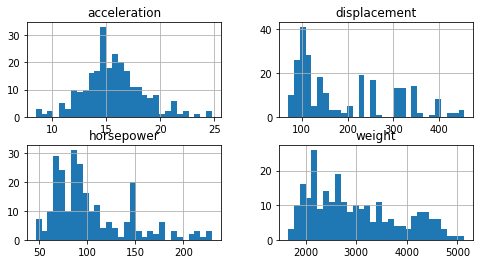

In [6]:
# let's explore the distribution of age

X_train[['displacement','weight', 'horsepower','acceleration']].hist(bins=30, figsize=(8,4))
plt.show()

## Equal frequency discretisation with Scikit-learn

In [7]:
disc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

disc.fit(X_train[['displacement','weight', 'horsepower','acceleration']])

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='kmeans')

In [8]:
disc.bin_edges_

array([array([ 70.        , 124.4588964 , 191.377457  , 280.26677489,
       372.24404762, 455.        ]),
       array([1649.        , 2361.41531004, 3015.68397887, 3759.13104839,
       4394.54354839, 5140.        ]),
       array([ 46.        ,  82.09078739, 118.83086967, 159.31968641,
       196.44285714, 230.        ]),
       array([ 8.5       , 12.74763169, 15.22217348, 17.73552489, 21.0547619 ,
       24.8       ])], dtype=object)

In [11]:
train_t = disc.transform(X_train[['displacement','weight', 'horsepower','acceleration']])

train_t = pd.DataFrame(train_t, columns = ['displacement','weight', 'horsepower','acceleration'])

train_t.head()

,displacement,weight,horsepower,acceleration
0,2.0,2.0,2.0,1.0
1,1.0,1.0,1.0,3.0
2,2.0,2.0,1.0,2.0
3,2.0,2.0,1.0,3.0
4,0.0,0.0,0.0,3.0


In [12]:
test_t = disc.transform(X_test[['displacement','weight', 'horsepower','acceleration']])

test_t = pd.DataFrame(test_t, columns = ['displacement','weight', 'horsepower','acceleration'])

Text(0, 0.5, 'Number of observations per bin')

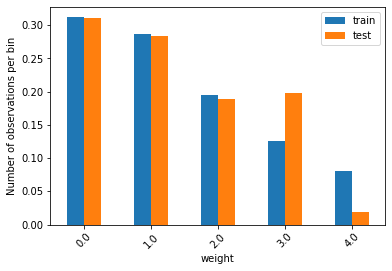

In [13]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['weight'])['weight'].count() / len(train_t)
t2 = test_t.groupby(['weight'])['weight'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

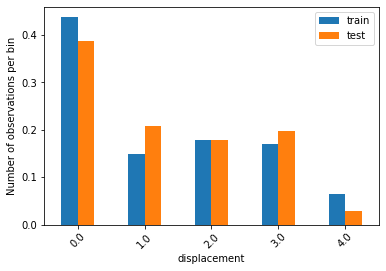

In [14]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['displacement'])['displacement'].count() / len(train_t)
t2 = test_t.groupby(['displacement'])['displacement'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

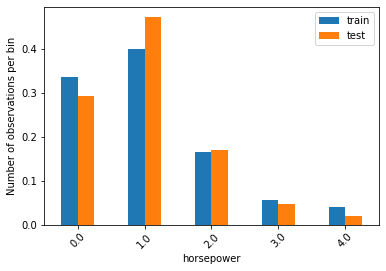

In [15]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['horsepower'])['horsepower'].count() / len(train_t)
t2 = test_t.groupby(['horsepower'])['horsepower'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

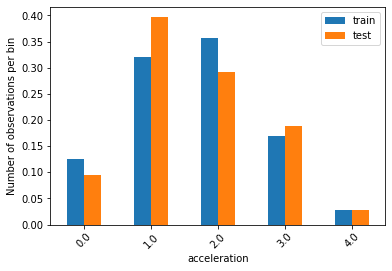

In [16]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['acceleration'])['acceleration'].count() / len(train_t)
t2 = test_t.groupby(['acceleration'])['acceleration'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Let's check the intervals created

In [17]:
disc.bin_edges_

array([array([ 70.        , 124.4588964 , 191.377457  , 280.26677489,
       372.24404762, 455.        ]),
       array([1649.        , 2361.41531004, 3015.68397887, 3759.13104839,
       4394.54354839, 5140.        ]),
       array([ 46.        ,  82.09078739, 118.83086967, 159.31968641,
       196.44285714, 230.        ]),
       array([ 8.5       , 12.74763169, 15.22217348, 17.73552489, 21.0547619 ,
       24.8       ])], dtype=object)

number of intervals per variable

In [18]:
disc.n_bins_

array([5, 5, 5, 5])